In [1]:
# !pip install missingno

In [2]:
# !pip install seaborn

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
question = pd.read_csv('C:/Users/Owner/pydataenv/data/archive/schema.csv')
question.shape

(290, 3)

In [5]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [6]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [7]:
mcq = pd.read_csv('C:/Users/Owner/pydataenv/data/archive/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [8]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [9]:
mcq.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

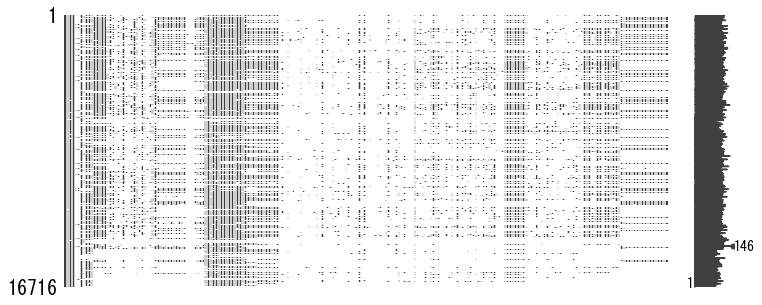

In [10]:
#missingnosはNaNデータに関して視覚化してる。
#NaNデータのカラムが多くて下記のグラフだけは把握しにくい

import missingno as mssn
mssn.matrix(mcq, figsize=(12,5))

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

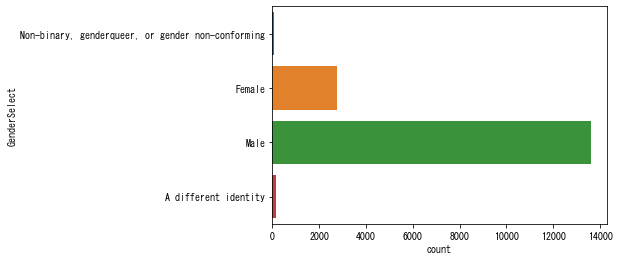

In [11]:
#性別
sns.countplot(y='GenderSelect', data=mcq)

In [12]:
#国籍別
con_df = pd.DataFrame(mcq['Country'].value_counts())
#print(con_df)
#'country'をindexにする
con_df['国家'] = con_df.index
#print(con_df)
con_df.columns = ['応答数','国家']
#print(con_df)
con_df = con_df.reset_index().drop('index',axis=1)
# print(con_df)
con_df.head(20)

,応答数,国家
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [13]:
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

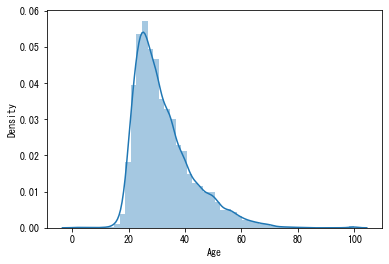

In [14]:
sns.distplot(mcq[mcq['Age'] > 0]['Age'])

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

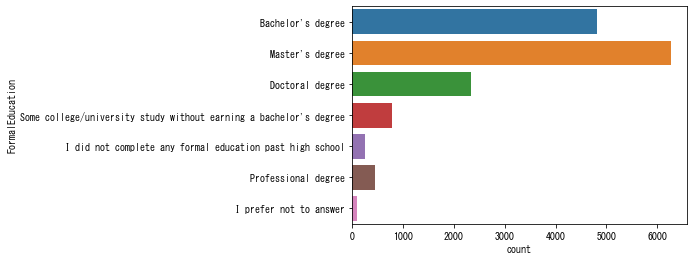

In [15]:
#学歴
sns.countplot(y='FormalEducation', data=mcq)

In [16]:
#major
mcq_major_cnt = pd.DataFrame(mcq['MajorSelect'].value_counts())
# print(mcq_major_cnt)
mcq_major_per = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))
# print(mcq_major_per)
mcq_major_df = mcq_major_cnt.merge(mcq_major_per, left_index = True, right_index = True)
# print(mcq_major_df)

mcq_major_df2 = pd.concat([mcq_major_cnt,mcq_major_per], axis=1)
# print(mcq_major_df2)
mcq_major_df2.columns= ['応答数','比率']
mcq_major_df2

,応答数,比率
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

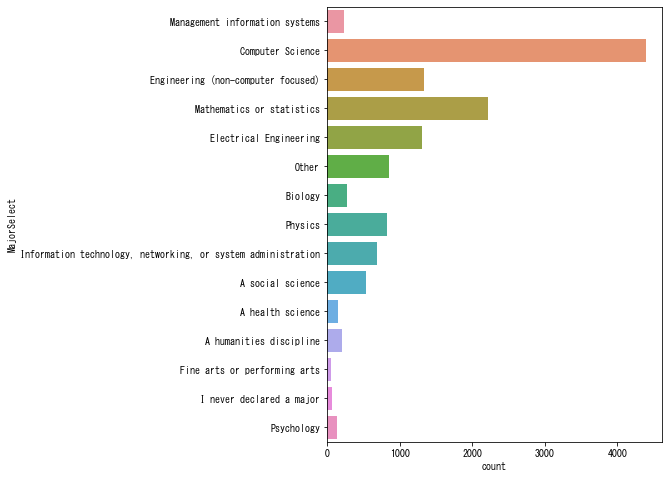

In [17]:
#在学中の人の専攻
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data = mcq)

In [18]:
#在職かないか
mcq_es_cnt = pd.DataFrame(mcq['EmploymentStatus'].value_counts())
mcq_es_per = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True))
# mcq_es_per
mcq_es_df = pd.concat([mcq_es_cnt,mcq_es_per], axis=1)
# mcq_es_df
mcq_es_df.columns = ['応答数','比率']
mcq_es_df

,応答数,比率
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

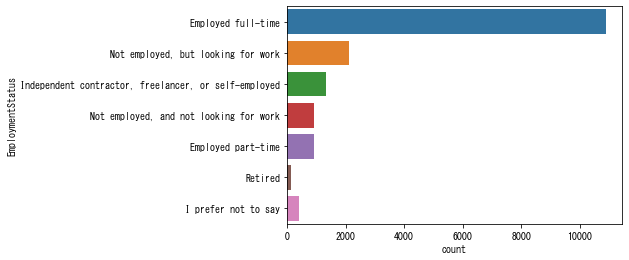

In [19]:
sns.countplot(y='EmploymentStatus', data=mcq)

<AxesSubplot:xlabel='count', ylabel='Tenure'>

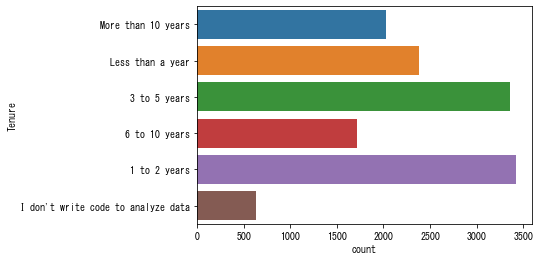

In [20]:
#programming経験
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea: 194


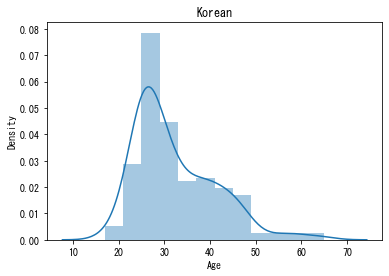

In [21]:
korea = mcq.query('Country == "South Korea"')
korea.shape
print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [22]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


<AxesSubplot:xlabel='GenderSelect', ylabel='count'>

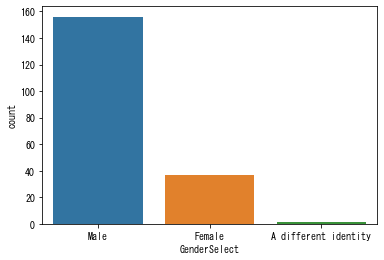

In [23]:
sns.countplot(x='GenderSelect', data=korea)

Text(0.5, 1.0, 'korean Male')

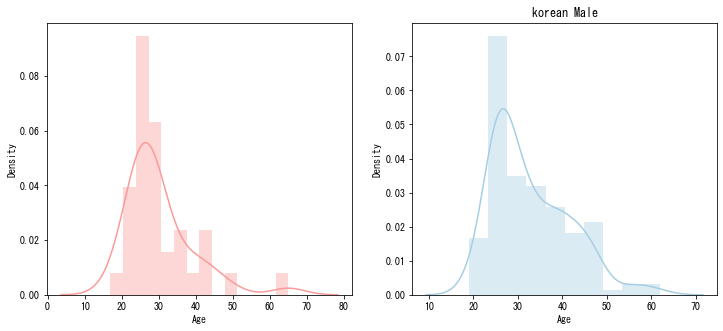

In [24]:
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
# sns.distplot(korea['age'])
korea2=korea.query('GenderSelect=="Female"')
sns.distplot(korea2['Age'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect'] == 'Male'].dropna(), norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

# korea['Age'].loc[korea.query('GenderSelect=="Female"')].dropna()
# korea['Age'].loc[korea['GenderSelect']=='Female'].dropna()
# korea.query('GenderSelect == "Female"')
# .dropna()

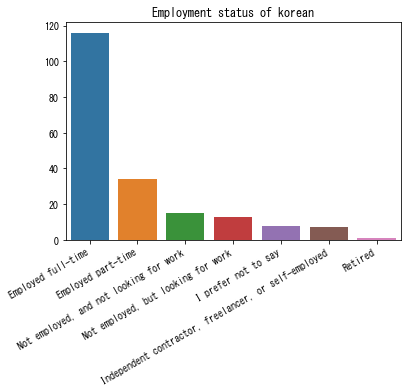

In [25]:
korea['EmploymentStatus'].unique()

sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation = 30, ha = 'right')
plt.title('Employment status of korean')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='StudentStatus', ylabel='count'>

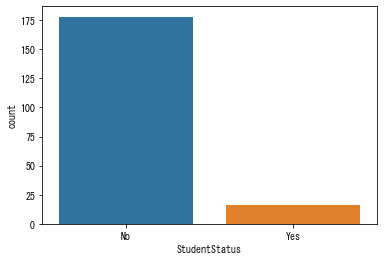

In [26]:
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
korea
sns.countplot(x='StudentStatus', data=korea)


<AxesSubplot:xlabel='count', ylabel='LanguageRecommendationSelect'>

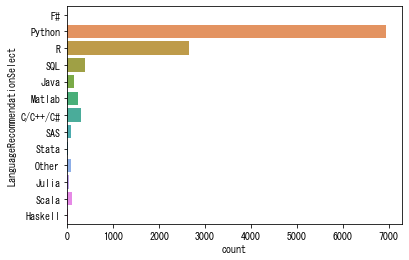

In [27]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

In [28]:
# df = pd.read_csv('C:/Users/Owner/pydataenv/data/201704health.csv')
# df

In [29]:
# !kaggle config view

<AxesSubplot:xlabel='count', ylabel='CurrentJobTitleSelect'>

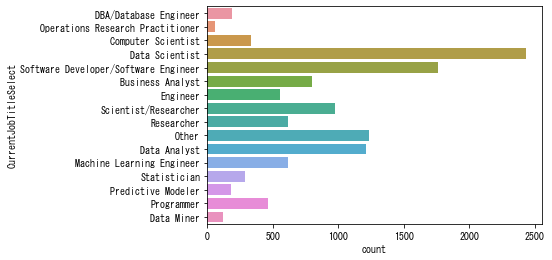

In [30]:
#現在やってる仕事
sns.countplot(y='CurrentJobTitleSelect', data=mcq)

In [31]:
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape
# .shape

(11830,)

In [32]:
# mcq['CurrentJobTitleSelect'].notnull()
data = mcq[(mcq['CurrentJobTitleSelect'].notnull()) & (
           (mcq['LanguageRecommendationSelect'] == 'R') |
          (mcq['LanguageRecommendationSelect'] == 'Python'))]
data           
#            (mcq.query('LanguageRecommendationSelect == "R" or LanguageRecommendationSelect == "Python"'))]
#print(data.shape)
# print(data.count())
# plt.figure(figsize=(8,10))
# sns.countplot(y='CurrentJobTitleSelect',hue='LanguageRecommendationSelect',data=data)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16550,Male,United States,47.0,Employed part-time,NaN,NaN,No,Yes,Engineer,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16577,Male,Norway,32.0,Employed full-time,NaN,NaN,Yes,NaN,Data Analyst,Perfectly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16664,Male,Spain,22.0,Employed part-time,NaN,NaN,No,Yes,Other,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16687,Male,Malaysia,55.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Business Analyst,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Q2.これから注目される部分は？

In [33]:
mca_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mca_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mca_ml_tool_df = pd.concat([mca_ml_tool_count,mca_ml_tool_percent],axis=1).head(20)
# mca_ml_tool_df
mca_ml_tool_df.columns = ['応答数','比率']
mca_ml_tool_df

,応答数,比率
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<AxesSubplot:xlabel='MLToolNextYearSelect'>

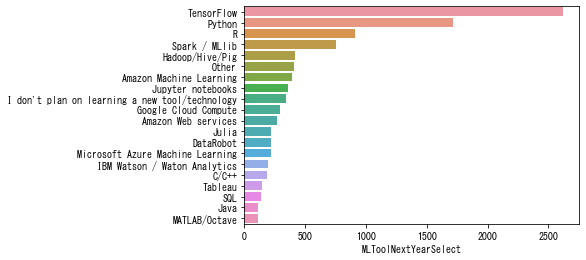

In [34]:
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
data.unique



sns.barplot(y=data.index,x=data)
# sns.countplot(y='MLToolNextYearSelect', x=data)

DATA Science Methods

<AxesSubplot:xlabel='MLMethodNextYearSelect'>

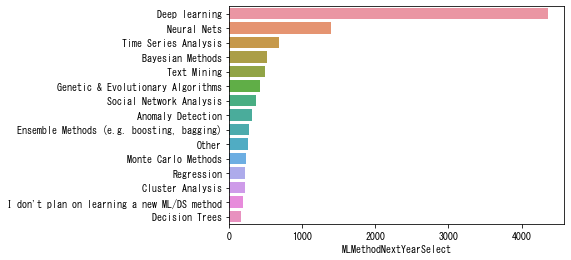

In [35]:
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)
# sns.countplot(y='MLMethodNextYearSelect', data=mcq)

Q3.どこでデータサイエンスを学べればいいか？

In [36]:
# data = mcq['LearningPlatformSelect'].astype('str')
# s = mcq.apply(
#     lambda x: pd.Series(x['LearningPlatformSelect']),axis=1).stack().reset_index(level=1,drop=True)
# # data=mcq['LearningPlatformSelect'].astype('str')
# s.name = 'platform'





In [37]:
#Serveyと誰に聞いたか
qc = question.loc[question['Column'].str.contains('LearningCategory')]
# qc = question
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [38]:
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') == 0]
use_features
# a = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != 0]
# a

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

<AxesSubplot:>

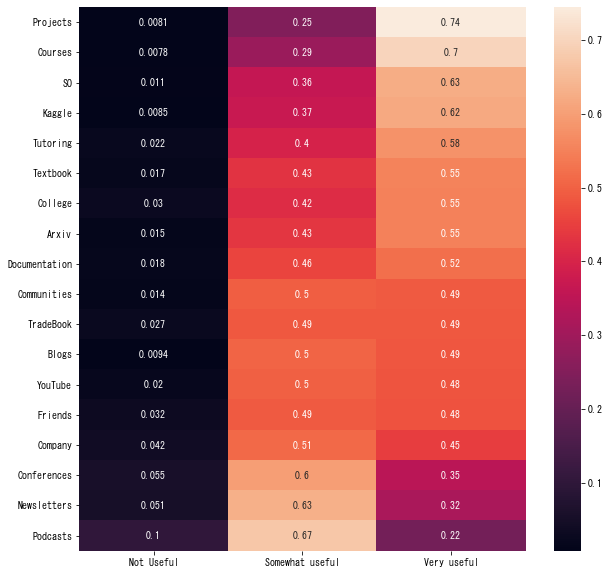

In [39]:
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a
    
fdf = pd.DataFrame(fdf).transpose().sort_values(
        'Very useful', ascending=False)
    
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
    "Very useful", ascending=False), annot=True)

<AxesSubplot:title={'center':'Usefullness of Learning Platform'}>

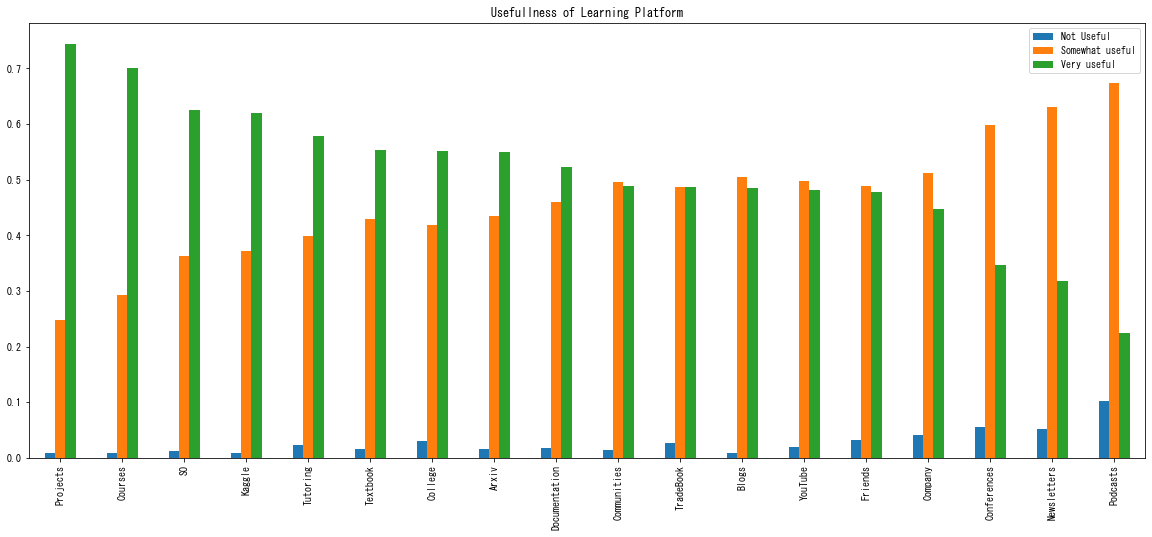

In [40]:
fdf.plot(kind= 'bar',figsize=(20,8),title="Usefullness of Learning Platform")

In [41]:
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [42]:
cdf = {}
for feature in cat_features:
    cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
    
#PIchart
cdf = pd.Series(cdf)
cdf

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

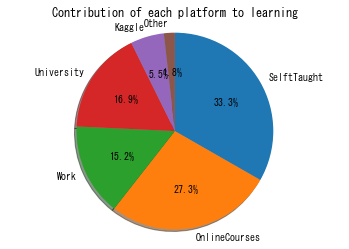

In [43]:
plt.pie(cdf,labels=cdf.index, autopct='%1.1f%%',shadow=True,startangle=90
       ,counterclock=False)
plt.axis('equal')
plt.title('Contribution of each platform to learning')
plt.show()

In [44]:
qc = question.loc[question['Column']
                  .str.contains('HardwarePersonalProjectsSelect')]
qc.shape
qc

,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [45]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(4206,)

In [46]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x : x.split(','))
s = mcq.apply(lambda x:
             pd.Series(x['HardwarePersonalProjectsSelect']),
             axis=1).stack().reset_index(level=1, drop=True)

s.name='hardware'

In [47]:
s = s[s !='nan']

In [48]:
pd.DataFrame(s.value_counts())

,hardware
Basic laptop (Macbook),2246
Azure,669
GCE ...),669
Laptop + Cloud service (AWS,669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


Q5.どのくらいの時間勉強するか

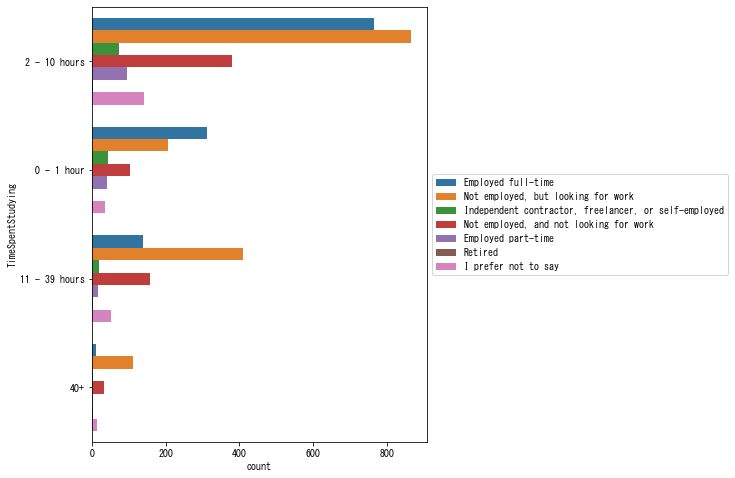

In [49]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying', data=mcq, hue= 'EmploymentStatus'
             ).legend(loc='center left',bbox_to_anchor=(1,0.5))

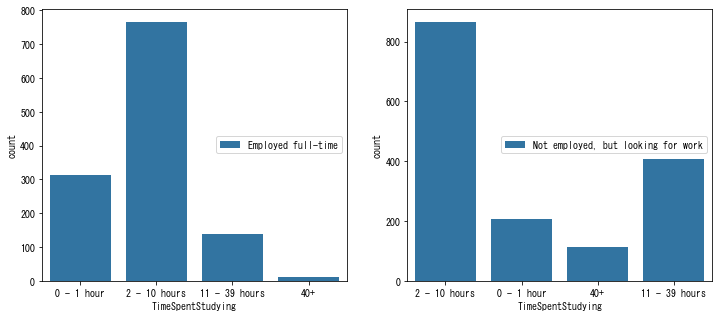

In [50]:
full_time = mcq[(mcq['TimeSpentStudying']).notnull() & 
                (mcq['EmploymentStatus'] == 'Employed full-time')]
 
looking_for_job = mcq[(mcq['TimeSpentStudying']).notnull() &
             (mcq['EmploymentStatus'].str.contains('but looking for work'))]

figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying',
             data=full_time,
             hue='EmploymentStatus', ax=ax1
             ).legend(loc='center right',bbox_to_anchor=(1,0.5))

sns.countplot(x='TimeSpentStudying',
             data=looking_for_job,
             hue='EmploymentStatus', ax=ax2
             ).legend(loc='center right',bbox_to_anchor=(1,0.5))


Q6.ブログ、授業、など推薦することがありますか？

In [51]:
mcq['BlogsPodcastsNewslettersSelect'] = mcq[
    'BlogsPodcastsNewslettersSelect'].astype('str').apply(lambda x: x.split(','))
mcq['BlogsPodcastsNewslettersSelect'].head()

0    [Becoming a Data Scientist Podcast, Data Machi...
1    [Becoming a Data Scientist Podcast, Siraj Rava...
2    [FastML Blog, No Free Hunch Blog, Talking Mach...
3                                     [KDnuggets Blog]
4    [Data Machina Newsletter, Jack's Import AI New...
Name: BlogsPodcastsNewslettersSelect, dtype: object

In [52]:
s = mcq.apply(lambda x: pd.Series(x['BlogsPodcastsNewslettersSelect']),
             axis=1).stack().reset_index(level=1,drop=True)
s.name = 'platforms'
s.head()

0    Becoming a Data Scientist Podcast
0              Data Machina Newsletter
0             O'Reilly Data Newsletter
0         Partially Derivative Podcast
0           R Bloggers Blog Aggregator
Name: platforms, dtype: object

In [53]:
s = s[s != 'nan'].value_counts()


<AxesSubplot:title={'center':'Most Popular Blogs and Podcasts'}, xlabel='platforms'>

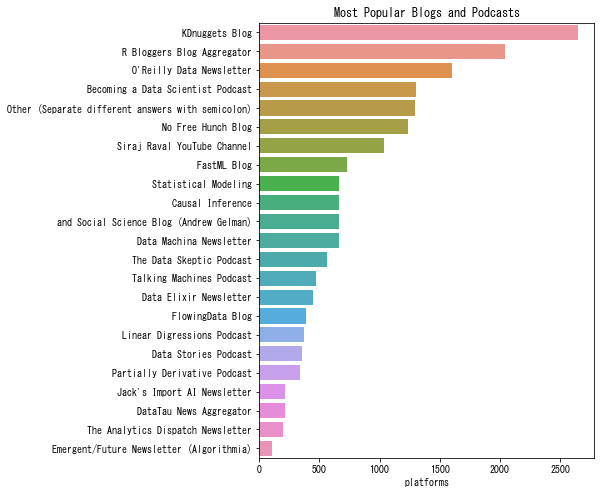

In [54]:
plt.figure(figsize=(6,8))
plt.title('Most Popular Blogs and Podcasts')
sns.barplot(y=s.index, x=s)


SirajRaval - youtube

In [55]:
mcq['CoursePlatformSelect'] = mcq[
    'CoursePlatformSelect'].astype('str').apply(lambda x:x.split(','))
mcq['CoursePlatformSelect'].head()

0              [nan]
1              [nan]
2    [Coursera, edX]
3              [nan]
4              [nan]
Name: CoursePlatformSelect, dtype: object

In [56]:
t = mcq.apply(lambda x: pd.Series(x['CoursePlatformSelect']),
             axis=1).stack().reset_index(level=1,drop=True)
t.name='course'
t.head(20)

0          nan
1          nan
2     Coursera
2          edX
3          nan
4          nan
5          nan
6          nan
7     Coursera
8          nan
9          nan
10    Coursera
11         nan
12    Coursera
12    DataCamp
12         edX
13         nan
14         nan
15         nan
16         nan
Name: course, dtype: object

In [57]:
t = t[t != 'nan'].value_counts()

<AxesSubplot:title={'center':'Most Popular Course Platforms'}, xlabel='course'>

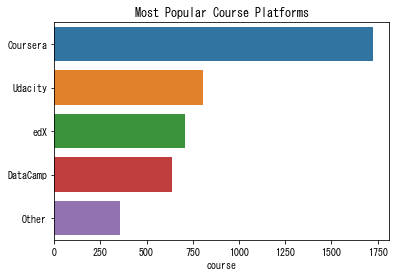

In [58]:
plt.title('Most Popular Course Platforms')
sns.barplot(y=t.index, x=t)

Q7.データサイエンス職務で一番重要だと思う技術は？

In [59]:
job_features = [x for x in mcq.columns if x.find(
    'JobSkillImportance') == 0
               and x.find('JobSkillImportanceOther') == -1]

job_features

['JobSkillImportanceBigData',
 'JobSkillImportanceDegree',
 'JobSkillImportanceStats',
 'JobSkillImportanceEnterpriseTools',
 'JobSkillImportancePython',
 'JobSkillImportanceR',
 'JobSkillImportanceSQL',
 'JobSkillImportanceKaggleRanking',
 'JobSkillImportanceMOOC',
 'JobSkillImportanceVisualizations']

In [60]:
jdf = {}
for feature in job_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jdf[feature[len('JobSkillImportance'):]] = a
jdf

{'BigData': Nice to have    0.574065
 Necessary       0.379929
 Unnecessary     0.046006
 Name: JobSkillImportanceBigData, dtype: float64,
 'Degree': Nice to have    0.598107
 Necessary       0.279867
 Unnecessary     0.122026
 Name: JobSkillImportanceDegree, dtype: float64,
 'Stats': Necessary       0.513889
 Nice to have    0.457576
 Unnecessary     0.028535
 Name: JobSkillImportanceStats, dtype: float64,
 'EnterpriseTools': Nice to have    0.564970
 Unnecessary     0.290200
 Necessary       0.144829
 Name: JobSkillImportanceEnterpriseTools, dtype: float64,
 'Python': Necessary       0.645994
 Nice to have    0.327214
 Unnecessary     0.026792
 Name: JobSkillImportancePython, dtype: float64,
 'R': Nice to have    0.513945
 Necessary       0.414807
 Unnecessary     0.071247
 Name: JobSkillImportanceR, dtype: float64,
 'SQL': Nice to have    0.491778
 Necessary       0.434224
 Unnecessary     0.073998
 Name: JobSkillImportanceSQL, dtype: float64,
 'KaggleRanking': Nice to have    0.677

In [61]:
jdf = pd.DataFrame(jdf).transpose()
jdf

,Necessary,Nice to have,Unnecessary
BigData,0.379929,0.574065,0.046006
Degree,0.279867,0.598107,0.122026
Stats,0.513889,0.457576,0.028535
EnterpriseTools,0.144829,0.564970,0.290200
Python,0.645994,0.327214,0.026792
R,0.414807,0.513945,0.071247
SQL,0.434224,0.491778,0.073998
KaggleRanking,0.118863,0.677261,0.203876
MOOC,0.107255,0.606994,0.285752
Visualizations,0.455392,0.490820,0.053788


<AxesSubplot:>

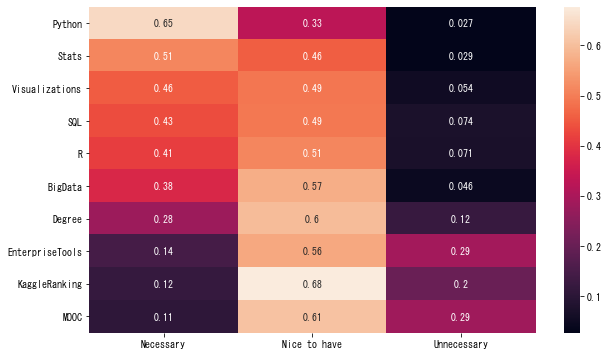

In [62]:
plt.figure(figsize=(10,6))
sns.heatmap(jdf.sort_values('Necessary', ascending=False), annot=True)

<AxesSubplot:title={'center':'Skill Importance in Data Science Jobs'}>

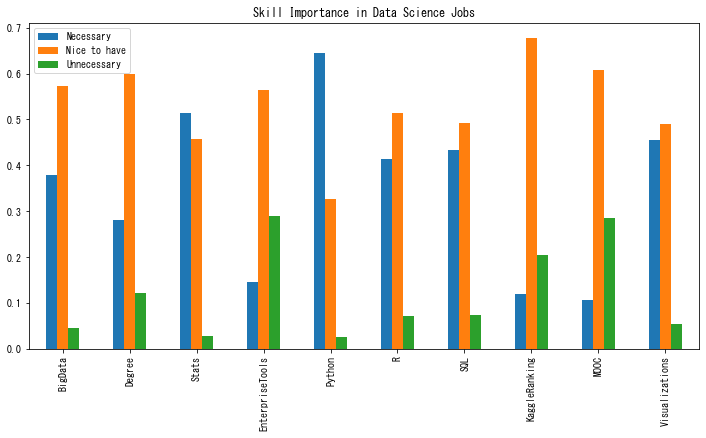

In [63]:
jdf.plot(kind='bar', figsize=(12,6),
        title='Skill Importance in Data Science Jobs')

Q8.データサイエンスの年収は？

In [64]:
mcq[mcq['CompensationAmount'].notnull()].shape

(5224, 228)

In [65]:
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq[
    'CompensationAmount'].str.replace('-','')

rates = pd.read_csv('C:/Users/Owner/pydataenv/data/archive/conversionRates.csv')
rates.drop('Unnamed: 0', axis=1, inplace=True)

salary = mcq[['CompensationAmount','CompensationCurrency',
             'GenderSelect',
             'Country',
             'CurrentJobTitleSelect']].dropna()
# salary = pd.concat([rates,salary], axis=1)
salary = salary.merge(rates,left_on='CompensationCurrency',
                     right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(
    salary['CompensationAmount']) * salary['exchangeRate']
salary.head()

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
0,250000,USD,Male,United States,Operations Research Practitioner,USD,1.000000,250000.0
1,80000,AUD,Female,Australia,Business Analyst,AUD,0.802310,64184.8
2,1200000,RUB,Male,Russia,Software Developer/Software Engineer,RUB,0.017402,20882.4
3,95000,INR,Male,India,Data Scientist,INR,0.015620,1483.9
4,1100000,TWD,Male,Taiwan,Software Developer/Software Engineer,TWD,0.033304,36634.4


In [66]:
print('Maximun Salary is USD $', salary['Salary'].dropna().astype(int).max())
print('Minimun Salary is USD $', salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $', salary['Salary'].dropna().astype(int).median())

Maximun Salary is USD $ 208999999
Minimun Salary is USD $ -2147483648
Median Salary is USD $ 53812.0


Text(0.5, 1.0, 'Salary Distribution')

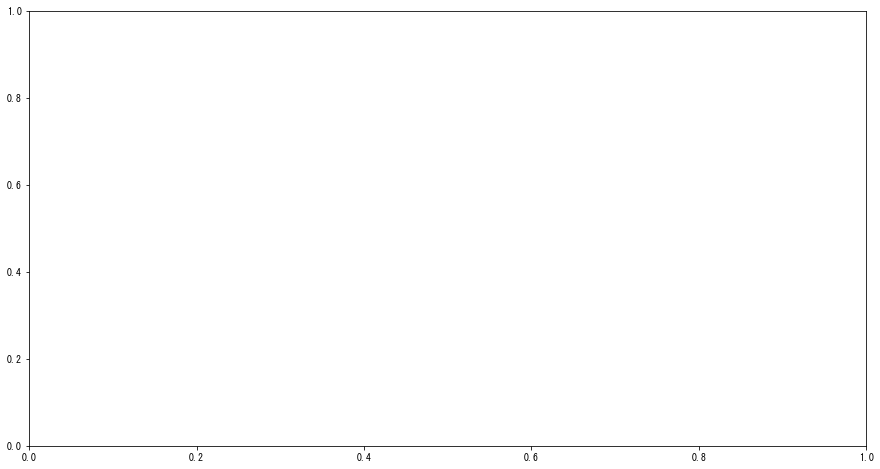

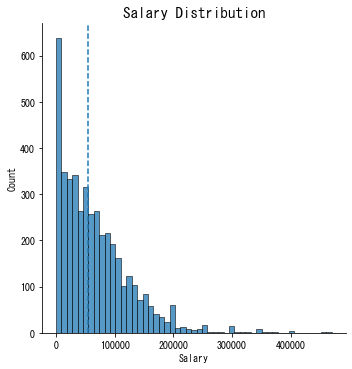

In [67]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary'] <500000]
sns.displot(salary['Salary'])
plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Salary Distribution', size=15)

Text(0.5, 1.0, 'Highest Salary Paying Countries')

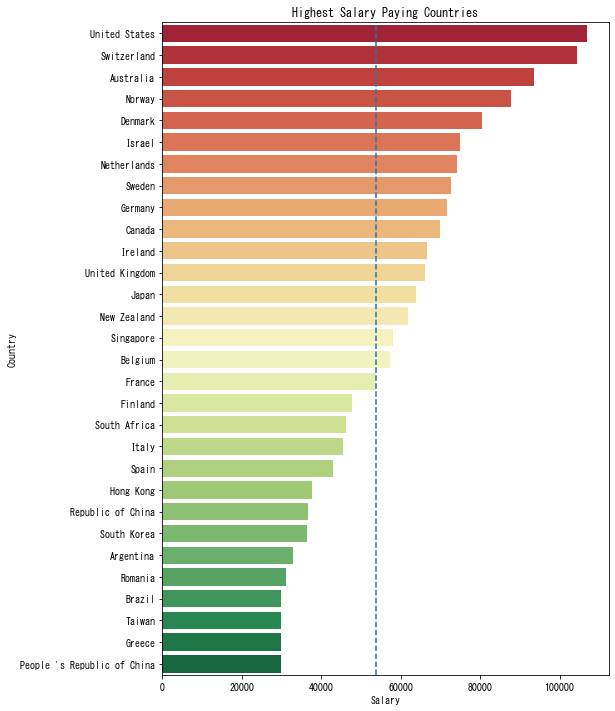

In [68]:
plt.subplots(figsize=(8,12))

sal_coun = salary.groupby('Country')['Salary'].median().sort_values(
    ascending=False)[:30].to_frame()


sns.barplot('Salary',
           sal_coun.index,
           data = sal_coun,
           palette='RdYlGn')


plt.axvline(salary['Salary'].median(), linestyle='dashed')
plt.title('Highest Salary Paying Countries')

<AxesSubplot:xlabel='Salary', ylabel='GenderSelect'>

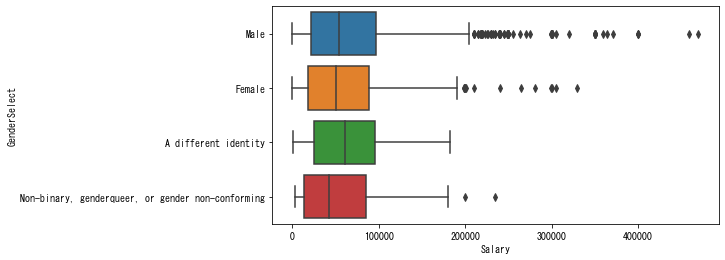

In [69]:
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary)

<AxesSubplot:xlabel='Salary', ylabel='GenderSelect'>

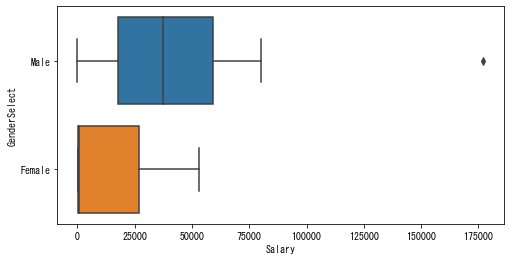

In [70]:
salary_korea = salary.loc[(salary['Country'] == 'South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect', x='Salary', data=salary_korea)

In [71]:
salary_korea.shape

(26, 8)

In [72]:
salary_korea[salary_korea['GenderSelect'] == 'Female']

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
479,30000,KRW,Female,South Korea,Data Analyst,KRW,0.000886,26.58
2903,800000,KRW,Female,South Korea,Researcher,KRW,0.000886,708.80
4063,60000000,KRW,Female,South Korea,Researcher,KRW,0.000886,53160.00


In [73]:
salary_korea_male = salary_korea[
    salary_korea['GenderSelect'] == 'Male']
salary_korea_male['Salary'].describe()

count        23.000000
mean      43540.617217
std       37800.608484
min           0.886000
25%       17500.000000
50%       37212.000000
75%       59238.000000
max      177200.000000
Name: Salary, dtype: float64

In [74]:
salary_korea_male

,CompensationAmount,CompensationCurrency,GenderSelect,Country,CurrentJobTitleSelect,originCountry,exchangeRate,Salary
85,40000000,KRW,Male,South Korea,Business Analyst,KRW,0.000886,35440.000
147,80000,USD,Male,South Korea,Researcher,USD,1.000000,80000.000
314,60000,USD,Male,South Korea,Business Analyst,USD,1.000000,60000.000
333,60000000,KRW,Male,South Korea,Researcher,KRW,0.000886,53160.000
562,50000000,KRW,Male,South Korea,Researcher,KRW,0.000886,44300.000
769,42000000,KRW,Male,South Korea,Software Developer/Software Engineer,KRW,0.000886,37212.000
799,1000,KRW,Male,South Korea,Machine Learning Engineer,KRW,0.000886,0.886
1060,75000000,KRW,Male,South Korea,Scientist/Researcher,KRW,0.000886,66450.000
1360,30000000,KRW,Male,South Korea,Statistician,KRW,0.000886,26580.000
1568,90000,SGD,Male,South Korea,Computer Scientist,SGD,0.742589,66833.010


Q9.個人プロジェクト、学習用のデータをどこで得られる？

In [75]:
mcq['PublicDatasetsSelect'] = mcq['PublicDatasetsSelect'].astype('str').apply(
    lambda x: x.split(','))

In [76]:
q = mcq.apply(
    lambda x: pd.Series(x['PublicDatasetsSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
q.name = 'courses'

In [77]:
q = q[q != 'nan'].value_counts()

In [78]:
pd.DataFrame(q)

,courses
Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.),6843
Google Search,3600
University/Non-profit research group websites,2873
I collect my own data (e.g. web-scraping),2560
GitHub,2400
Government website,2079
Other,399


<AxesSubplot:title={'center':'Most Popular Dataset platform'}, xlabel='courses'>

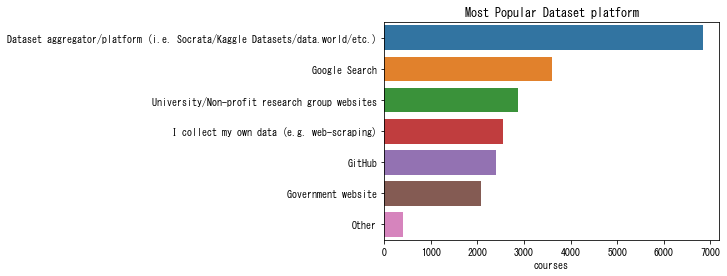

In [79]:
plt.title('Most Popular Dataset platform')
sns.barplot(y=q.index, x=q)

In [80]:
q

Dataset aggregator/platform (i.e. Socrata/Kaggle Datasets/data.world/etc.)    6843
Google Search                                                                 3600
University/Non-profit research group websites                                 2873
I collect my own data (e.g. web-scraping)                                     2560
GitHub                                                                        2400
Government website                                                            2079
Other                                                                          399
Name: courses, dtype: int64

In [81]:
#主観式データ読み込む
ff = pd.read_csv('C:/Users/Owner/pydataenv/data/archive/freeformResponses.csv')
ff.shape

(16716, 62)

In [82]:
#Servey内容と誰に聞いたか
# question
qc = question.loc[question['Column'].str.contains('PersonalProjectsChallengeFreeForm')]
print(qc.shape)
qc.Question.values[0]

(1, 3)


'What is your biggest challenge with the public datasets you find for personal projects?'

In [83]:
ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15)
ppcff.name = '応答数'
pd.DataFrame(ppcff)

,応答数
None,23
Cleaning the data,20
Cleaning,20
Dirty data,16
Data Cleaning,14
none,13
Data cleaning,10
dirty data,10
-,9
Size,9


Q11.データサイエンス業務で最も時間が必要なことは？

In [84]:
time_feature = [x for x in mcq.columns if x.find('Time') != -1 ][4:10]
time_feature2 = [x for x in mcq.columns if x.find('Time') == 0 ][4:10]
print(time_feature)
print(time_feature2)

['TimeGatheringData', 'TimeModelBuilding', 'TimeProduction', 'TimeVisualizing', 'TimeFindingInsights', 'TimeOtherSelect']
['TimeVisualizing', 'TimeFindingInsights', 'TimeOtherSelect']


GatheringData      36.144754
ModelBuilding      21.268066
Production         10.806372
Visualizing        13.869372
FindingInsights    13.094776
OtherSelect         2.396247
dtype: float64



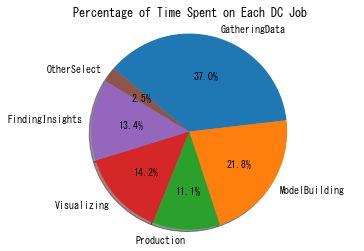

In [85]:
tdf = {}

for feature in time_feature:
    
    tdf[feature[len('Time'):]]  = mcq[feature].mean()
    
tdf = pd.Series(tdf)
print(tdf)
print()

plt.pie(tdf, labels=tdf.index, autopct='%1.1f%%', shadow=True, startangle=140,counterclock=False)
plt.axis('equal')
plt.title('Percentage of Time Spent on Each DC Job')
plt.show()

Q11.データサイエンスを職業にする場合一番きにすることは？

In [89]:
qc = question.loc[question['Column'].str.contains('JobFactor')]
print(qc.shape)

qc.Question.values

(16, 3)


array(['How are you assessing potential job opportunities? - Opportunities for professional development',
       'How are you assessing potential job opportunities? - The compensation and benefits offered',
       "How are you assessing potential job opportunities? - The office environment I'd be working in",
       "How are you assessing potential job opportunities? - The languages, frameworks, and other technologies I'd be working with",
       "How are you assessing potential job opportunities? - The amount of time I'd have to spend commuting",
       'How are you assessing potential job opportunities? - How projects are managed at the company or organization',
       'How are you assessing potential job opportunities? - The experience level called for in the job description',
       "How are you assessing potential job opportunities? - The specific department or team I'd be working on",
       "How are you assessing potential job opportunities? - The specific role or job title I'd 

In [90]:
job_factor = [x for x in mcq.columns if x.find('JobFactor') != -1 ]

<AxesSubplot:>

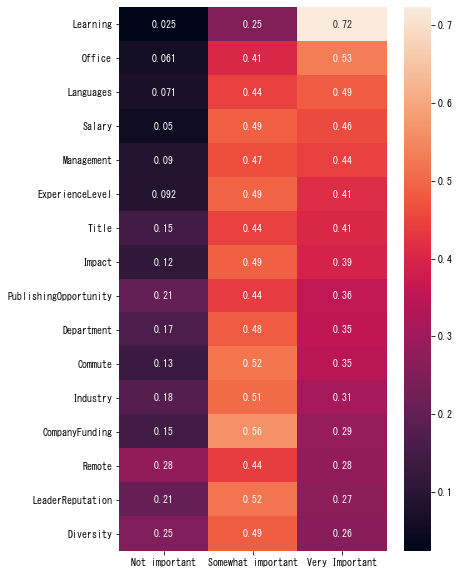

In [100]:
jfdf = {}
for feature in job_factor:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    jfdf[feature[len('JobFactor'):]] = a

jfdf = pd.DataFrame(jfdf).transpose()

plt.subplots(figsize=(6,10))
sns.heatmap(jfdf.sort_values('Very Important', ascending=False), annot=True)


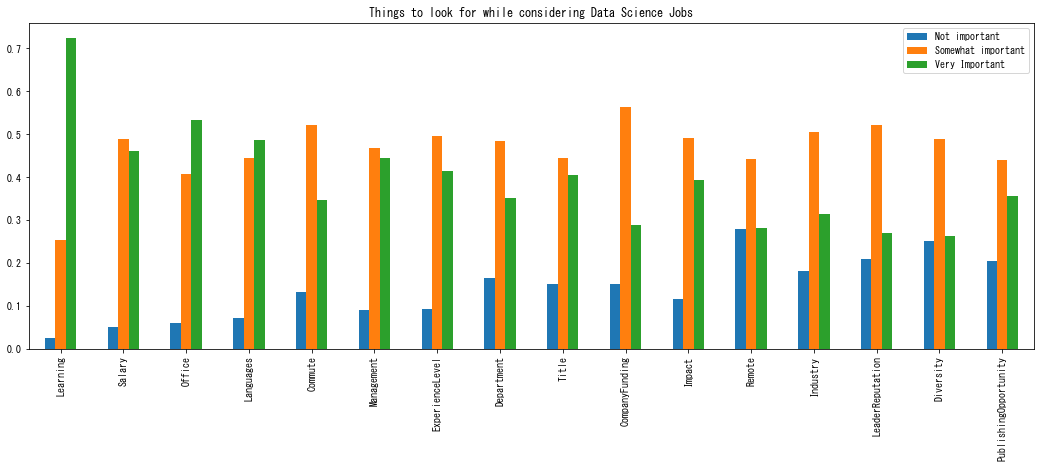

In [101]:
jfdf.plot(kind='bar', figsize=(18,6), title='Things to look for while considering Data Science Jobs')
plt.show()

Q12.データサイエンスのため学位が重要か？

<AxesSubplot:xlabel='count', ylabel='UniversityImportance'>

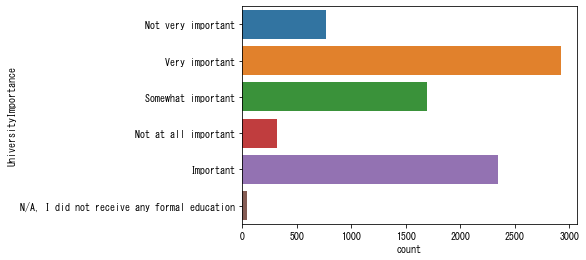

In [103]:
sns.countplot(y='UniversityImportance', data=mcq)

In [105]:
!pip install plotly

Using legacy setup.py install for retrying, since package 'wheel' is not installed.
    Running setup.py install for retrying: started
    Running setup.py install for retrying: finished with status 'done'


You should consider upgrading via the 'c:\users\owner\pydataenv\scripts\python.exe -m pip install --upgrade pip' command.


In [106]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.figure_factory as fig_fact

top_uni = mcq['UniversityImportance'].value_counts().head(5)
top_uni_dist = []
for uni in top_uni.index:
    top_uni_dist.append(
        mcq[(mcq['Age'].notnull()) & 
            (mcq['UniversityImportance'] == uni)]['Age'])

group_labels = top_uni.index

fig = fig_fact.create_distplot(
    top_uni_dist, group_labels, show_hist=False)
py.iplot(fig, filename='University Importance by Age')

Q13.どこからデータサイエンスの勉強をしたらいいか

In [108]:
mcq[mcq['FirstTrainingSelect'].notnull()].shape

(14712, 228)

<AxesSubplot:xlabel='count', ylabel='FirstTrainingSelect'>

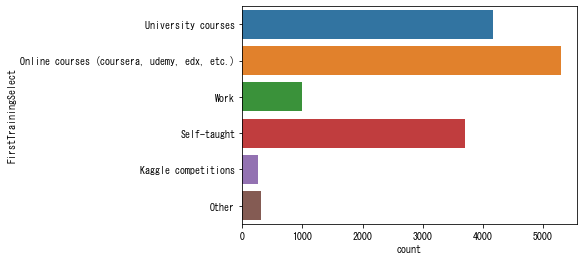

In [109]:
sns.countplot(y='FirstTrainingSelect', data=mcq)

Q14.データサイエンスの履歴書で何が重要か？

<AxesSubplot:xlabel='count', ylabel='ProveKnowledgeSelect'>

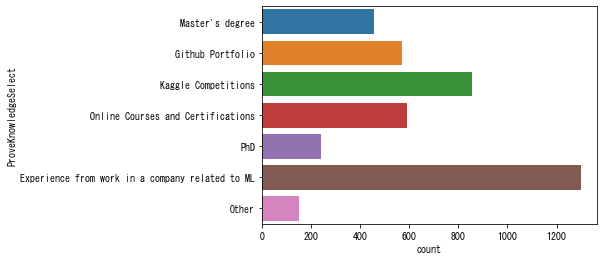

In [113]:
sns.countplot(y='ProveKnowledgeSelect', data=mcq)

Q15.MLのため数学は重要か？

In [117]:
qc = question[question['Column'].str.contains('AlgorithmUnderstandingLevel')]
qc

,Column,Question,Asked
227,AlgorithmUnderstandingLevel,At which level do you understand the mathemati...,CodingWorker


In [120]:
mcq[mcq['AlgorithmUnderstandingLevel'].notnull()].shape

(7410, 228)

<AxesSubplot:xlabel='count', ylabel='AlgorithmUnderstandingLevel'>

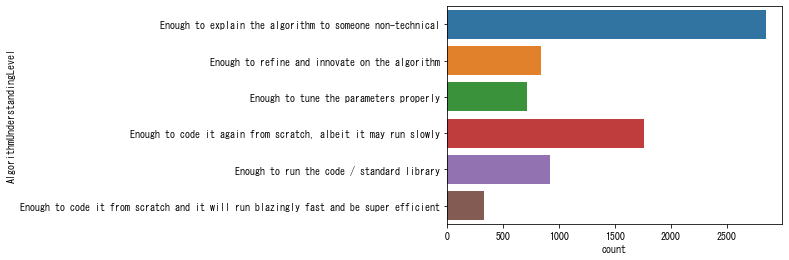

In [121]:
sns.countplot(y='AlgorithmUnderstandingLevel', data=mcq)

Q16.仕事はどこから探していいか

In [123]:
qc = question[question['Column'].str.contains('JobSearchResource|EmployerSearchMethod')]
qc

,Column,Question,Asked
108,EmployerSearchMethod,How did you find your current job? - Selected ...,CodingWorker-NC
109,EmployerSearchMethodOtherFreeForm,How did you find your current job? - Some othe...,CodingWorker-NC
271,JobSearchResource,Which resource has been the best for finding d...,Learners
272,JobSearchResourceFreeForm,Which resource has been the best for finding d...,Learners


<AxesSubplot:title={'center':'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

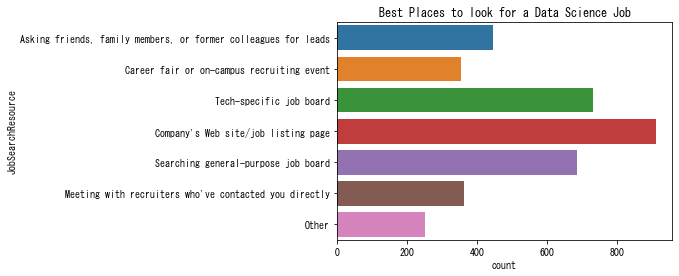

In [124]:
plt.title('Best Places to look for a Data Science Job')
sns.countplot(y='JobSearchResource', data = mcq)

<AxesSubplot:title={'center':'Top Places to get Data Science Jobs'}, xlabel='count', ylabel='EmployerSearchMethod'>

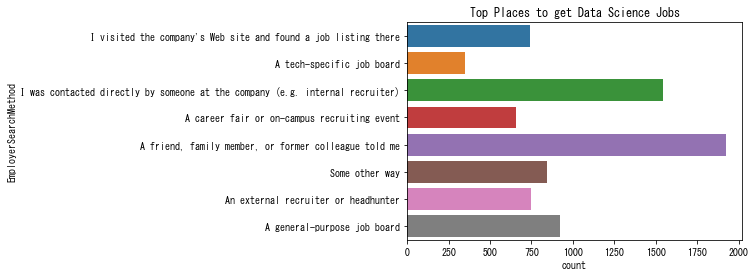

In [125]:
plt.title('Top Places to get Data Science Jobs')
sns.countplot(y='EmployerSearchMethod', data = mcq)

<AxesSubplot:title={'center':'Best Places to look for a Data Science Job'}, xlabel='count', ylabel='JobSearchResource'>

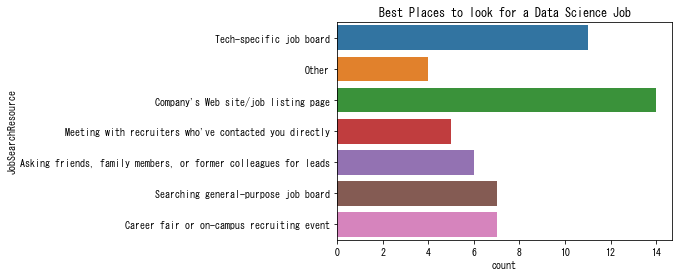

In [126]:
#韓国の場合
plt.title('Best Places to look for a Data Science Job')
sns.countplot(y='JobSearchResource', data = korea)